In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [155]:
cd '/Users/matthewdavis/Google Drive/Graduate School/MIST 6150/Project'

/Users/matthewdavis/Google Drive/Graduate School/MIST 6150/Project


In [156]:
ls

Project_Prelim.ipynb    tmpl8oioayl.csv
Rest.Inspections.ipynb  tmprgadla7z.csv


## Location of datasets:

- df_ins ("Restaurant Inspections"):  https://data.boston.gov/dataset/food-establishment-inspections/resource/4582bec6-2b4f-4f9e-bc55-cbaa73117f4c

- df_cri ("Boston Crime"):  https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b


In [157]:
df_ins = pd.read_csv('tmprgadla7z.csv')
df_cri = pd.read_csv('tmpl8oioayl.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# First, investigating the Crime Dataset

In [158]:
df_cri.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192017516,616,Larceny,LARCENY THEFT OF BICYCLE,D14,794,NaN,2019-03-08 17:00:00,2019,3,Friday,17,Part One,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)"
1,I192017513,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,C11,407,NaN,2019-03-08 21:13:00,2019,3,Friday,21,Part Three,WASHINGTON ST,42.273420,-71.070000,"(42.27342041, -71.07000030)"
2,I192017507,3115,Investigate Person,INVESTIGATE PERSON,E13,574,NaN,2019-03-08 08:00:00,2019,3,Friday,8,Part Three,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
3,I192017506,3115,Investigate Person,INVESTIGATE PERSON,E13,574,NaN,2019-03-08 21:33:00,2019,3,Friday,21,Part Three,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
4,I192017503,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,A7,22,NaN,2019-03-08 20:44:00,2019,3,Friday,20,Part Three,HAVRE ST,42.374951,-71.035879,"(42.37495129, -71.03587934)"


In [159]:
df_cri.shape

(368348, 17)

In [160]:
df_cri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368348 entries, 0 to 368347
Data columns (total 17 columns):
incident_number        368348 non-null object
offense_code           368348 non-null int64
offense_code_group     368348 non-null object
offense_description    368348 non-null object
district               366365 non-null object
reporting_area         368348 non-null object
shooting               1486 non-null object
occurred_on_date       368348 non-null object
year                   368348 non-null int64
month                  368348 non-null int64
day_of_week            368348 non-null object
hour                   368348 non-null int64
ucr_part               368248 non-null object
street                 356812 non-null object
lat                    344460 non-null float64
long                   344460 non-null float64
location               368348 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 47.8+ MB


In [161]:
df_cri.isnull().any()

incident_number        False
offense_code           False
offense_code_group     False
offense_description    False
district                True
reporting_area         False
shooting                True
occurred_on_date       False
year                   False
month                  False
day_of_week            False
hour                   False
ucr_part                True
street                  True
lat                     True
long                    True
location               False
dtype: bool

In [162]:
# Six columns have NULL values.

df_cri.isnull().any().sum()

6

In [164]:
# These are the specific columns that have null values.
df_cri.isnull().sum()

incident_number             0
offense_code                0
offense_code_group          0
offense_description         0
district                 1983
reporting_area              0
shooting               366862
occurred_on_date            0
year                        0
month                       0
day_of_week                 0
hour                        0
ucr_part                  100
street                  11536
lat                     23888
long                    23888
location                    0
dtype: int64

In [229]:
df_cri_drop = df_cri.dropna(axis='rows', inplace = True)
df_cri_drop.shape

AttributeError: 'NoneType' object has no attribute 'shape'

## From the original crime data, I want to make a separate dataframe.

In [103]:
df_cri1 = df_cri[['offense_code', 'offense_code_group', 'year', 'month', 'lat', 'long']]
df_cri1.head()

,offense_code,offense_code_group,year,month,lat,long
0,616,Larceny,2019,3,42.349780,-71.134230
1,3006,Medical Assistance,2019,3,42.273420,-71.070000
2,3115,Investigate Person,2019,3,NaN,NaN
3,3115,Investigate Person,2019,3,NaN,NaN
4,3831,Motor Vehicle Accident Response,2019,3,42.374951,-71.035879


In [127]:
df_cri1.groupby('offense_code_group')
df_cri1.head()

,offense_code,offense_code_group,year,month,lat,long
0,616,Larceny,2019,3,42.349780,-71.134230
1,3006,Medical Assistance,2019,3,42.273420,-71.070000
4,3831,Motor Vehicle Accident Response,2019,3,42.374951,-71.035879
6,3114,Investigate Property,2019,3,42.314784,-71.071610
7,613,Larceny,2019,3,42.344896,-71.096592


In [128]:
df_cri1.isnull().sum()

offense_code          0
offense_code_group    0
year                  0
month                 0
lat                   0
long                  0
dtype: int64

In [129]:
#removing rows that have any NULL values

df_cri1 = df_cri1.dropna(axis = 'rows', how = 'any')

In [130]:
df_cri1.isnull().sum()

offense_code          0
offense_code_group    0
year                  0
month                 0
lat                   0
long                  0
dtype: int64

In [131]:
df_cri1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344460 entries, 0 to 368347
Data columns (total 6 columns):
offense_code          344460 non-null int64
offense_code_group    344460 non-null object
year                  344460 non-null int64
month                 344460 non-null int64
lat                   344460 non-null float64
long                  344460 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 18.4+ MB


In [169]:
df_cri1.shape

(344460, 6)

In [167]:
# I want to eventually make a dataframe with the offense_code_group column.  There are 67 unique values here.
df_cri1.offense_code_group.nunique()

67

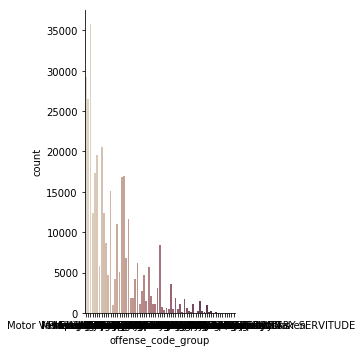

In [170]:
#Something may be happening with the offense_code_group column and the count of infractions.

sns.catplot(x="offense_code_group", kind="count", palette="ch:.25", data=df_cri1)

In [135]:
df_cri1.head(20)

,offense_code,offense_code_group,year,month,lat,long
0,616,Larceny,2019,3,42.349780,-71.134230
1,3006,Medical Assistance,2019,3,42.273420,-71.070000
4,3831,Motor Vehicle Accident Response,2019,3,42.374951,-71.035879
6,3114,Investigate Property,2019,3,42.314784,-71.071610
7,613,Larceny,2019,3,42.344896,-71.096592
8,802,Simple Assault,2019,3,42.350152,-71.057533
9,3831,Motor Vehicle Accident Response,2019,3,42.351717,-71.078133
11,3831,Motor Vehicle Accident Response,2019,3,42.335778,-71.094386
13,2647,Other,2019,3,42.349897,-71.131434
15,3006,Medical Assistance,2019,3,42.307924,-71.112297


In [181]:
df_cri1['count'] = df_cri1.groupby('offense_code_group')['offense_code_group'].transform('count')

In [222]:
df_cri1.tail(50)

,offense_code,offense_code_group,year,month,lat,long,count
368296,3125,Warrant Arrests,2015,7,42.335560,-71.074364,8711
368297,623,Larceny,2015,7,42.335560,-71.074364,29174
368298,403,Aggravated Assault,2016,6,42.357428,-71.058326,8467
368299,403,Aggravated Assault,2016,6,42.357428,-71.058326,8467
368300,3125,Warrant Arrests,2016,6,42.357428,-71.058326,8711
368301,619,Larceny,2016,7,42.307038,-71.066153,29174
368302,619,Larceny,2016,7,42.307038,-71.066153,29174
368303,3125,Warrant Arrests,2016,7,42.307038,-71.066153,8711
368304,3125,Warrant Arrests,2015,10,42.311277,-71.089093,8711
368305,3125,Warrant Arrests,2015,10,42.311277,-71.089093,8711


In [183]:
df_cri2 = df_cri1.offense_code_group.unique()
df_cri2 = pd.DataFrame(df_cri2)
df_cri2['count'] = df_cri1.groupby('offense_code_group')['offense_code_group'].transform('count')

In [186]:
df_cri2.columns = ["Infraction", "Count"]
df_cri2.head(68)

,Infraction,Count
0,Larceny,29174.0
1,Medical Assistance,26448.0
2,Motor Vehicle Accident Response,NaN
3,Investigate Property,NaN
4,Simple Assault,35759.0
5,Other,NaN
6,Violations,12427.0
7,Investigate Person,29174.0
8,Towed,17277.0
9,Warrant Arrests,35759.0


In [191]:
df_cri2.isnull().sum()

Infraction     0
Count         11
dtype: int64

In [194]:
df_cri2 = df_cri2.dropna(axis = 'rows')
df_cri2.isnull().sum()

Infraction    0
Count         0
dtype: int64

In [195]:
df_cri2.shape

(56, 2)

Object `df.reindex` not found.


In [216]:
df_cri2 = df_cri2.sort_values('Count', ascending = False).reset_index(drop = True)
df_cri2.head()

,Infraction,Count
0,Prostitution,35759.0
1,Verbal Disputes,35759.0
2,License Violation,35759.0
3,Offenses Against Child / Family,35759.0
4,Service,35759.0


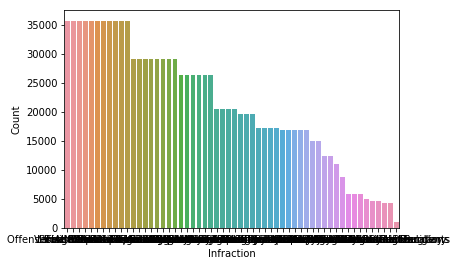

In [221]:
sns.barplot(x='Infraction', y='Count', data=df_cri2)

# Now, investigating the restaurant dataset

In [226]:
df_ins.tail(3)

,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,...,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
562717,Zume's Coffee House,NaN,KERRIGAN ROBERT,Doherty,John,27260,2012-02-06 10:50:02,2019-12-31 23:59:00,Active,FT,...,,NaN,NaN,,219 Main ST,Charlestown,MA,2129,88457.0,"(42.376540000, -71.065421000)"
562718,Zume's Coffee House,NaN,KERRIGAN ROBERT,Doherty,John,27260,2012-02-06 10:50:02,2019-12-31 23:59:00,Active,FT,...,,NaN,NaN,,219 Main ST,Charlestown,MA,2129,88457.0,"(42.376540000, -71.065421000)"
562719,Zume's Coffee House,NaN,KERRIGAN ROBERT,Doherty,John,27260,2012-02-06 10:50:02,2019-12-31 23:59:00,Active,FT,...,2018-08-06 14:11:53,Pass,2018-08-07 08:30:57,The front refrigerator is running warm; almond...,219 Main ST,Charlestown,MA,2129,88457.0,"(42.376540000, -71.065421000)"


In [51]:
df_ins.shape

(562720, 26)

In [53]:
df_ins.describe()

,licenseno,property_id
count,562720.000000,432886.000000
mean,48060.974312,130923.952080
std,55551.677860,82348.092032
min,54.000000,0.000000
25%,21317.000000,70345.000000
50%,24817.500000,155769.000000
75%,67432.000000,157423.000000
max,387614.000000,423795.000000


In [54]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562720 entries, 0 to 562719
Data columns (total 26 columns):
businessname    562720 non-null object
dbaname         5426 non-null object
legalowner      392419 non-null object
namelast        562720 non-null object
namefirst       562606 non-null object
licenseno       562720 non-null int64
issdttm         562720 non-null object
expdttm         562720 non-null object
licstatus       562720 non-null object
licensecat      562720 non-null object
descript        562720 non-null object
result          562720 non-null object
resultdttm      562720 non-null object
violation       530897 non-null object
viollevel       530897 non-null object
violdesc        530896 non-null object
violdttm        562720 non-null object
violstatus      530897 non-null object
statusdate      233765 non-null object
comments        562716 non-null object
address         562720 non-null object
city            562694 non-null object
state           562720 non-null ob

In [57]:
# Thirteen columns have NULL values

df_ins.isnull().any().sum()

13

In [72]:
df_ins.isnull().sum()

businessname         0
dbaname         557294
legalowner      170301
namelast             0
namefirst          114
licenseno            0
issdttm              0
expdttm              0
licstatus            0
licensecat           0
descript             0
result               0
resultdttm           0
violation        31823
viollevel        31823
violdesc         31824
violdttm             0
violstatus       31823
statusdate      328955
comments             4
address              0
city                26
state                0
zip                235
property_id     129834
location        160565
dtype: int64